In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/5.csv')
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [ ]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
df = df.drop('User ID', axis = 1)

In [ ]:
df.head(2)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_onehot = pd.get_dummies(df, columns=['Gender'], prefix = ['Gender'])
df_onehot.head(10)

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
5,27,58000,0,0,1
6,27,84000,0,1,0
7,32,150000,1,1,0
8,25,33000,0,0,1
9,35,65000,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df_onehot["EstimatedSalary"]=scaler.fit_transform(df_onehot[["EstimatedSalary"]])

In [ ]:
Column_loc = ['Age','EstimatedSalary','Gender_Female','Gender_Male','Purchased']
df_onehot = df_onehot[Column_loc]
df_onehot.head(2)

,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased
0,19,0.029630,0,1,0
1,35,0.037037,0,1,0


In [ ]:
X = df_onehot.iloc[:,:-1].values
y = df_onehot.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.25, random_state = 4)
print(train_X.shape,train_y.shape,test_X.shape,test_y.shape)

(300, 4) (300,) (100, 4) (100,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X,train_y)

LogisticRegression()

In [ ]:
predict_y = lr.predict(test_X)


In [ ]:
predict_y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predict_y)

0.86

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score
print(roc_auc_score(test_y, predict_y))
print(precision_score(test_y, predict_y))
print(recall_score(test_y, predict_y))

0.8142857142857143
0.8076923076923077
0.7


In [ ]:
print(confusion_matrix(test_y, predict_y))
tp,fp, fn, tn = confusion_matrix(test_y, predict_y).ravel()
print(f'Correctly Predicted made Purchase {tp}')
print(f'Falsely Predicted made Purchase {fp}')
print(f'Falsely Predicted made did NOT made Purchase {fn}')
print(f'Correctly Predicted made did NOT made Purchase {tn}')

[[65  5]
 [ 9 21]]
Correctly Predicted made Purchase 65
Falsely Predicted made Purchase 5
Falsely Predicted made did NOT made Purchase 9
Correctly Predicted made did NOT made Purchase 21


In [ ]:
print('Area under ROC curve is',roc_auc_score(test_y, lr.predict_proba(test_X)[:,1]))

Area under ROC curve is 0.9357142857142857


In [ ]:
accuracy_score(test_y, predict_y)

0.86

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


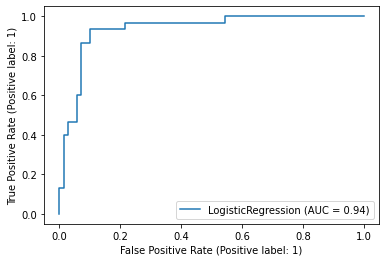

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, test_X, test_y);

In [ ]:
Result_Test_X = pd.DataFrame(test_X, columns =['Age','EstimatedSalary','Gender_Female','Gender_Male'])
Result_Predict_y = pd.DataFrame(predict_y, columns= ['Pred_Purchase'])
pd.concat([Result_Test_X, Result_Predict_y], axis=1)

,Age,EstimatedSalary,Gender_Female,Gender_Male,Pred_Purchase
0,33.0,0.333333,1.0,0.0,0
1,27.0,0.511111,1.0,0.0,0
2,25.0,0.533333,0.0,1.0,0
3,38.0,0.259259,1.0,0.0,0
4,27.0,0.540741,0.0,1.0,0
...,...,...,...,...,...
95,45.0,0.222222,1.0,0.0,0
96,32.0,0.777778,0.0,1.0,0
97,21.0,0.422222,0.0,1.0,0
98,45.0,0.125926,0.0,1.0,0


In [ ]:
Result_test_y = pd.DataFrame(test_y, columns= ['Purchased'])
Result = pd.concat([Result_Test_X, Result_test_y, Result_Predict_y], axis=1)
Result

,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased,Pred_Purchase
0,33.0,0.333333,1.0,0.0,0,0
1,27.0,0.511111,1.0,0.0,0,0
2,25.0,0.533333,0.0,1.0,0,0
3,38.0,0.259259,1.0,0.0,0,0
4,27.0,0.540741,0.0,1.0,0,0
...,...,...,...,...,...,...
95,45.0,0.222222,1.0,0.0,1,0
96,32.0,0.777778,0.0,1.0,1,0
97,21.0,0.422222,0.0,1.0,0,0
98,45.0,0.125926,0.0,1.0,1,0


In [ ]:
# Comparing test_y and predicted_y values and saving
Result.to_csv('Final_Prediction_test_values.csv')